## Even Mathieu functions when parameter is purely imaginary

This is the case $q = is$, where $i=\sqrt{-1}$ and $s>0$ is a real number. The even, cosine, Mathieu function $ce_{2n}(q, y)$ is defined as

\begin{equation}
ce_{2n}(q, y) = \sum_{r=0}^{\infty}A_{2r}^{(2n)}\cos{(2ry)} .
\end{equation}


Substituting this definition into Mathieu's equation, yields a three-term recurrence equation for the Fourier coefficients

\begin{eqnarray}\label{recurrence}
    \cos{(0)}: & \;\;\;\;\;\;\;\;\;\;\; a_{2n}A_{0}^{(2n)} - qA_{2}^{(2n)} = 0\nonumber\\
    \cos{(2y)}: & \;\;\;\;\;\;\;\;\;\;\;\; \left(-4 + a_{2n}\right)A_{2}^{(2n)} -q\left[2A_{0}^{(2n)}+A_{4}^{(2n)}\right] = 0\nonumber\\
    \cos{(4y)}: & \;\;\;\;\;\;\;\;\;\;\;\;\; \left(-16 +a_{2n}\right)A^{(2n)}_{4} - q\left[A_{2}^{(2n)} + A_{6}^{2n}\right] = 0\nonumber\\
    \cos{(6y)}: & \;\;\;\;\;\;\;\;\;\;\;\; \left(-36 +a_{2n}\right)A_{6}^{(2n)} - q\left[A_{4}^{(2n)} + A_{8}^{(2n)} \right] = 0 \nonumber\\
    \cos{(2ry)}: & \;\;\;\;\;\;\;\;\;\;\;\;\; \left[ -(2r)^2 +a_{2n}\right] A_{2r}^{(2n)} -q\left[A_{2r+2}^{(2n)} + A_{2r-2}^{(2n)} \right] = 0
\end{eqnarray}

Or, in matrix form this is:

\begin{equation}\label{eig_system}
    \begin{pmatrix}
    0 & \sqrt{2}q & & & & & \\
    \sqrt{2}q & 4 & q & & & & \\
    & q & 16 & q & & &\\
    & & q & 36 & q & & \\
    & & &\ddots & \ddots & \ddots&\\
    & & & & q & 4r^2 & q\\
    & & & & & & \ddots
    \end{pmatrix}
    \;\begin{pmatrix}
    \sqrt{2}A_{0}^{(2n)}\\
    A_{2}^{(2n)}\\
    A_{4}^{(2n)}\\
    A_{6}^{(2n)}\\
    \vdots\\
    A_{2r}^{(2n)}\\
    \vdots
    \end{pmatrix}
    = \; a_{2n}
    \;\begin{pmatrix}
    \sqrt{2}A_{0}^{(2n)}\\
    A_{2}^{(2n)}\\
    A_{4}^{(2n)}\\
    A_{6}^{(2n)}\\
    \vdots\\
    A_{2r}^{(2n)}\\
    \vdots
    \end{pmatrix} .
\end{equation}

Formally, the matrix is infinite in size.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [2]:
from mathieu_functions import mathieu_functions as mfs
from mathieu_functions import A_coefficients
from eig_system import matrix_system

In [3]:
# Define parameters
L = np.pi
alpha = 10
Nq = 250
K = np.arange(0, Nq / alpha, 1 / alpha)
eps = .75  # ta / td
Pe = 1 / eps
Q = (1j) * 2 * K / eps
qf = Q[-1].imag
Nx = 1000
tol = 1e-5
y = np.linspace(0, L, Nx)
M = 25  # size of matrix. It determines the higher cosine mode (e.g. cos(2Nx)) on each Mathieu function
colors = ['#0000cc', '#990000', 'darkgreen',
          'indigo', '#009999', 'orange', 
         'k']

In [4]:
print('largest value of q-array:')
print(qf)

largest value of q-array:
66.4


## Matrix System

Below, find an example of the matrix A, for a choice of canonical parameter $q=i$. The truncated matrix size is $10\times10$ to approximate the infinite matrix.


In [5]:
A = matrix_system(2*(1j), 10)

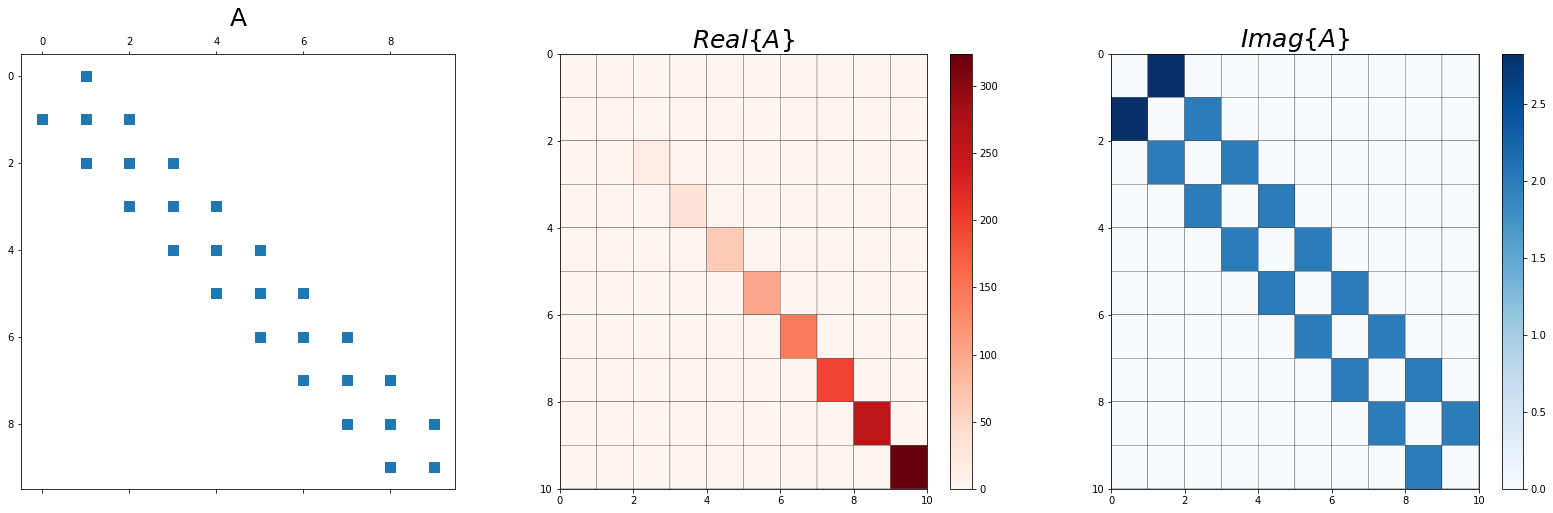

In [6]:
fig, ax = plt.subplots(figsize=(28, 8))
gs = gridspec.GridSpec(1,3)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.spy(A, markersize=10)
plt.title('A', fontsize=25)
ax2 = plt.subplot(gs[1])
plt.pcolor(A.real, cmap='Reds', edgecolors='k')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r'$Real\{A\}$', fontsize=25)
ax3 = plt.subplot(gs[2])
plt.pcolor(A.imag, cmap='Blues', edgecolors='k')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r'$Imag\{A\}$', fontsize=25)
plt.show()

Fig. **A**: Non-zero elements of the truncated matrix. **B)**: Real elements of the matrix. These are the diagonal elements and increase as $4r^2$ where $r$ is the size of the matrix (in this case $r=9$). **C)** Imaginary (off-diagonal) elements of the matrix, given by the value of the parameter $q=1$, except for the first two elements which are $\sqrt{2}q=\sqrt{2}$.

# Calculation of Mathieu eigenvalues, Fourier Coefficients and Eigenfunctions

In order to assure convergence in the calculation of Mathieu functions, there is an important rule of thumb:

* The larger the Mathieu Canonical parameter $q$, purely imaginary in the case of the Advection-Diffusion Equation, the larger the matrix must be. 

In the case of $q=60i$, a matrix of $25\times25$ (M=25 in the code above) is enough.

In [7]:
# Compute the eigenvalues $a_{2n}$ and the Fourier coefficients $A_{2r}^{(2n)}$ as functions of $q$:
A_vals = A_coefficients(Q, M, 'even', 'one')  # even function with period one-pi

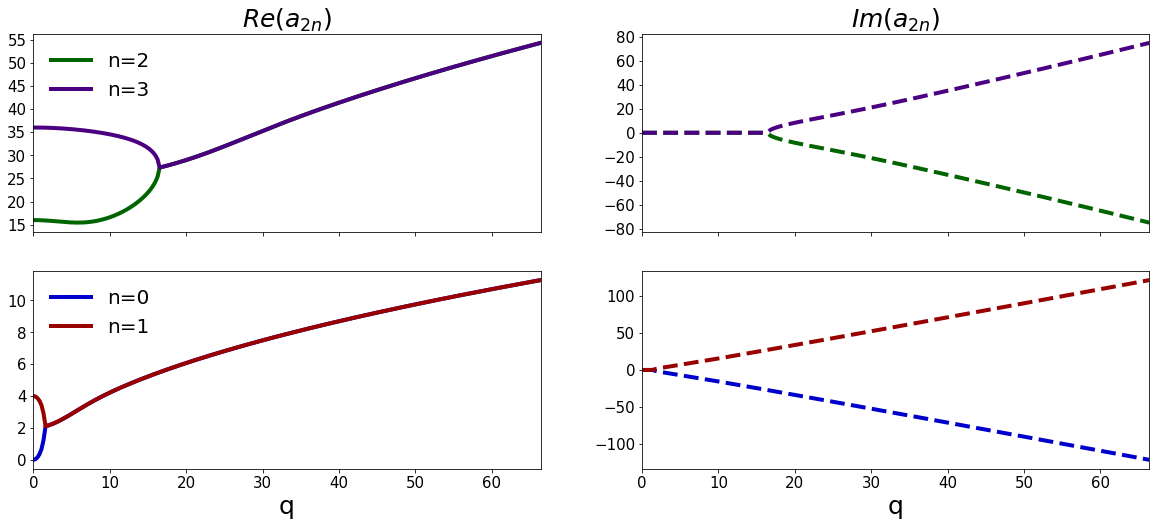

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(2,2)
gs.update(hspace=0.2)
ax1 = plt.subplot(gs[2])
plt.plot(Q.imag, A_vals['a0'].real, color=colors[0], lw=4, label='n=0')
plt.plot(Q.imag, A_vals['a2'].real, color=colors[1], lw=4, label='n=1')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[3])
plt.plot(Q.imag, A_vals['a0'].imag, color=colors[0], lw=4, ls='--', label='n=0')
plt.plot(Q.imag, A_vals['a2'].imag, color=colors[1], lw=4, ls='--', label='n=1')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
ax3 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a4'].real, color=colors[2], lw=4, label='n=2')
plt.plot(Q.imag, A_vals['a6'].real, color=colors[3], lw=4, label='n=3')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.title(r'$Re(a_{2n})$', fontsize=25)
ax4 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a4'].imag, color=colors[2], lw=4, ls='--', label='n=2')
plt.plot(Q.imag, A_vals['a6'].imag, color=colors[3], lw=4, ls='--', label='n=3')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax4.get_xticklabels(), visible=False)
# plt.legend(fontsize=20, frameon=False)
plt.title(r'$Im(a_{2n})$', fontsize=25)
plt.show()

**Fig** Left: Real component of eigenvalues $a_{2n}$. Right: Imaginary component of eigenvalues $a_{2n}$. The purely real pairs of adjacent eigenvalues coalesce at Exceptional Points, as $q$ increases, becoming a complex conjugate pairs.

## Orthonormality of Fourier Coefficients

The Fourier coefficients that define each Mathieu eigenfunction satisfy the following orthonormality relation

\begin{equation}
    \sum_{n=0}^{\infty}A_{2p}^{(2n)}A_{2r}^{(2n)} = \delta_{pr} - \frac{\delta_{0p}\delta_{0r}}{2} .
\end{equation}

From here, the normalizations are recovered for the sequence of $r=0$ Fourier coefficients, given by

\begin{equation}
 2\sum_{n=0}^{\infty}\left[A_{0}^{(2n)}\right]^2 = 1 ,
\end{equation}

and for the rest:

\begin{equation}
 \sum_{n=0}^{\infty}\left[A_{2r}^{(2n)}\right]^2 = 1, \;\;\;r >1 .
\end{equation}

Despite the Fourier coefficients being complex for some values of $q$, the square quantities above are just as if the Fourier Coefficients were real: There is no calculation of complex conjugated terms. This is a special case of indefinite norms, and will also apply when approximating functions (inner product). Some more information about such behavior can be found in the literature of Mathieu functions.

# Normalizations

In [9]:
sum0 = 0
sum2 = 0
sum4 = 0
sum6 = 0
sum8 = 0
sum10 = 0
sum12 = 0
sum14 = 0

for n in range(M):
    sum0 = sum0 + (A_vals['A'+str(2*n)][:, 0] ** 2)
    sum2 = sum2 + (A_vals['A'+str(2*n)][:, 1] ** 2)
    sum4 = sum4 + (A_vals['A'+str(2*n)][:, 2] ** 2)
    sum6 = sum6 + (A_vals['A'+str(2*n)][:, 3] ** 2)
    sum8 = sum8 + (A_vals['A'+str(2*n)][:, 4] ** 2)
    sum10 = sum10 + (A_vals['A'+str(2*n)][:, 5] ** 2)
    sum12 = sum12 + (A_vals['A'+str(2*n)][:, 6] ** 2)
    sum14 = sum14 + (A_vals['A'+str(2*n)][:, 7] ** 2)

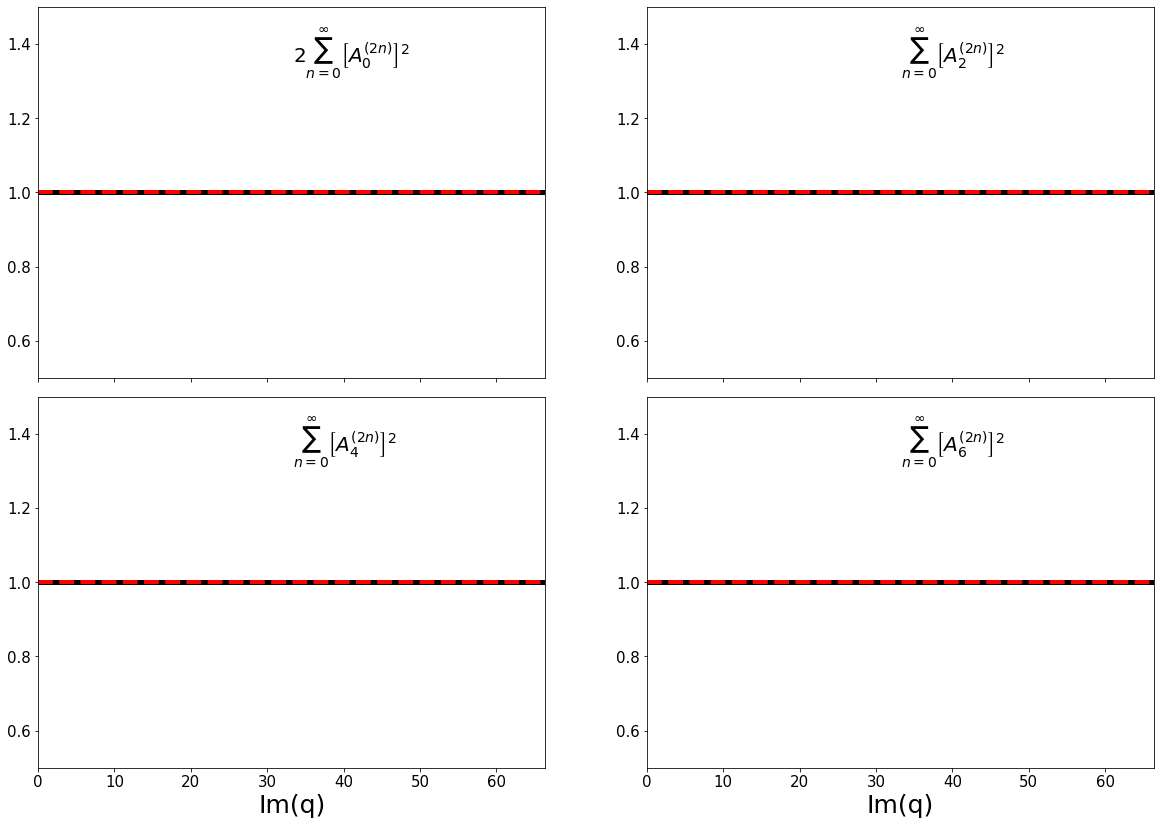

In [10]:
fig, ax = plt.subplots(figsize=(20, 14))
gs = gridspec.GridSpec(2,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, 2 * sum0.real, 'k', lw=5)
plt.plot(Q.imag, np.ones(np.shape(Q)), 'r--', lw=4)
plt.ylim([0.5, 1.5])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
ax1.annotate(r'$2\sum_{n=0}^{\infty}\left[A_{0}^{(2n)} \right]^2$', 
            xy=(Q[Nq//2].imag, 1.35), xytext=(Q[Nq//2].imag, 1.35), fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, sum2.real, 'k', lw=5)
plt.plot(Q.imag, np.ones(np.shape(Q)), 'r--', lw=4)
plt.ylim([0.5, 1.5])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.annotate(r'$\sum_{n=0}^{\infty}\left[A_{2}^{(2n)} \right]^2$', 
            xy=(Q[Nq//2].imag, 1.35), xytext=(Q[Nq//2].imag, 1.35), fontsize=20)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, sum4.real, 'k', lw=5)
plt.plot(Q.imag, np.ones(np.shape(Q)), 'r--', lw=4)
plt.ylim([0.5, 1.5])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax3.annotate(r'$\sum_{n=0}^{\infty}\left[A_{4}^{(2n)} \right]^2$', 
            xy=(Q[Nq//2].imag, 1.35), xytext=(Q[Nq//2].imag, 1.35), fontsize=20)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, sum6.real, 'k', lw=5)
plt.plot(Q.imag, np.ones(np.shape(Q)), 'r--', lw=4)
plt.ylim([0.5, 1.5])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax4.annotate(r'$\sum_{n=0}^{\infty}\left[A_{6}^{(2n)} \right]^2$', 
            xy=(Q[Nq//2].imag, 1.35), xytext=(Q[Nq//2].imag, 1.35), fontsize=20)
plt.show()

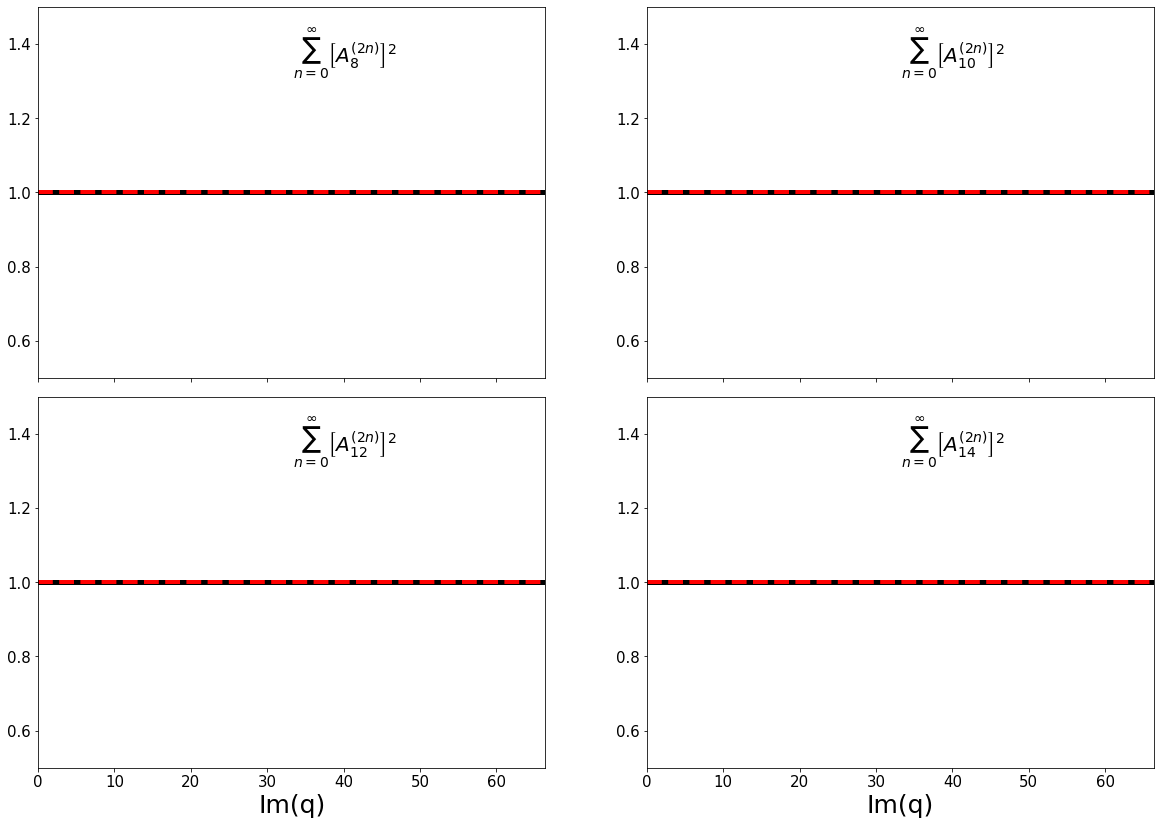

In [11]:
fig, ax = plt.subplots(figsize=(20, 14))
gs = gridspec.GridSpec(2,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, sum8.real, 'k', lw=5)
plt.plot(Q.imag, np.ones(np.shape(Q)), 'r--', lw=4)
plt.ylim(0.5, 1.5)
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
ax1.annotate(r'$\sum_{n=0}^{\infty}\left[A_{8}^{(2n)} \right]^2$', 
            xy=(Q[Nq//2].imag, 1.35), xytext=(Q[Nq//2].imag, 1.35), fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, sum10.real, 'k', lw=5)
plt.plot(Q.imag, np.ones(np.shape(Q)), 'r--', lw=4)
plt.ylim(0.5, 1.5)
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.annotate(r'$\sum_{n=0}^{\infty}\left[A_{10}^{(2n)} \right]^2$', 
            xy=(Q[Nq//2].imag, 1.35), xytext=(Q[Nq//2].imag, 1.35), fontsize=20)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, sum12.real, 'k', lw=5)
plt.plot(Q.imag, np.ones(np.shape(Q)), 'r--', lw=4)
plt.ylim(0.5, 1.5)
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax3.annotate(r'$\sum_{n=0}^{\infty}\left[A_{12}^{(2n)} \right]^2$', 
            xy=(Q[Nq//2].imag, 1.35), xytext=(Q[Nq//2].imag, 1.35), fontsize=20)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, sum14.real, 'k', lw=5)
plt.plot(Q.imag, np.ones(np.shape(Q)), 'r--', lw=4)
plt.ylim(0.5, 1.5)
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax4.annotate(r'$\sum_{n=0}^{\infty}\left[A_{14}^{(2n)} \right]^2$', 
            xy=(Q[Nq//2].imag, 1.35), xytext=(Q[Nq//2].imag, 1.35), fontsize=20)
plt.show()

# Orthogonality of Fourier Coefficients

In [12]:
sum02 = 0
sum04 = 0
sum06 = 0
sum08 = 0
sum010 = 0
sum24 = 0
sum26 = 0
sum28 = 0
sum210 = 0
sum46 = 0
sum48 = 0
sum410 = 0
sum68 = 0
sum610 = 0
sum810 = 0
sum1012 = 0
for n in range(M):
    sum02 = sum02 + (A_vals['A'+str(2*n)][:, 0]) * (A_vals['A'+str(2*n)][:, 1])
    sum04 = sum04 + (A_vals['A'+str(2*n)][:, 0]) * (A_vals['A'+str(2*n)][:, 2])
    sum06 = sum06 + (A_vals['A'+str(2*n)][:, 0]) * (A_vals['A'+str(2*n)][:, 3])
    sum08 = sum08 + (A_vals['A'+str(2*n)][:, 0]) * (A_vals['A'+str(2*n)][:, 4])
    sum010 = sum010 + (A_vals['A'+str(2*n)][:, 0]) * (A_vals['A'+str(2*n)][:, 5])
    sum24 = sum24 + (A_vals['A'+str(2*n)][:, 1]) * (A_vals['A'+str(2*n)][:, 2])
    sum26 = sum26 + (A_vals['A'+str(2*n)][:, 1]) * (A_vals['A'+str(2*n)][:, 3])
    sum28 = sum28 + (A_vals['A'+str(2*n)][:, 1]) * (A_vals['A'+str(2*n)][:, 4])
    sum210 = sum210 + (A_vals['A'+str(2*n)][:, 1]) * (A_vals['A'+str(2*n)][:, 5])
    sum46 = sum46 + (A_vals['A'+str(2*n)][:, 2]) * (A_vals['A'+str(2*n)][:, 3])
    sum48 = sum48 + (A_vals['A'+str(2*n)][:, 2]) * (A_vals['A'+str(2*n)][:, 4])
    sum410 = sum410 + (A_vals['A'+str(2*n)][:, 2]) * (A_vals['A'+str(2*n)][:, 5])
    sum68 = sum68 + (A_vals['A'+str(2*n)][:, 3]) * (A_vals['A'+str(2*n)][:, 4])
    sum610 = sum610 + (A_vals['A'+str(2*n)][:, 3]) * (A_vals['A'+str(2*n)][:, 5])
    sum810 = sum810 + (A_vals['A'+str(2*n)][:, 4]) * (A_vals['A'+str(2*n)][:, 5])
    sum1012 = sum1012 + (A_vals['A'+str(2*n)][:, 5]) * (A_vals['A'+str(2*n)][:, 6])


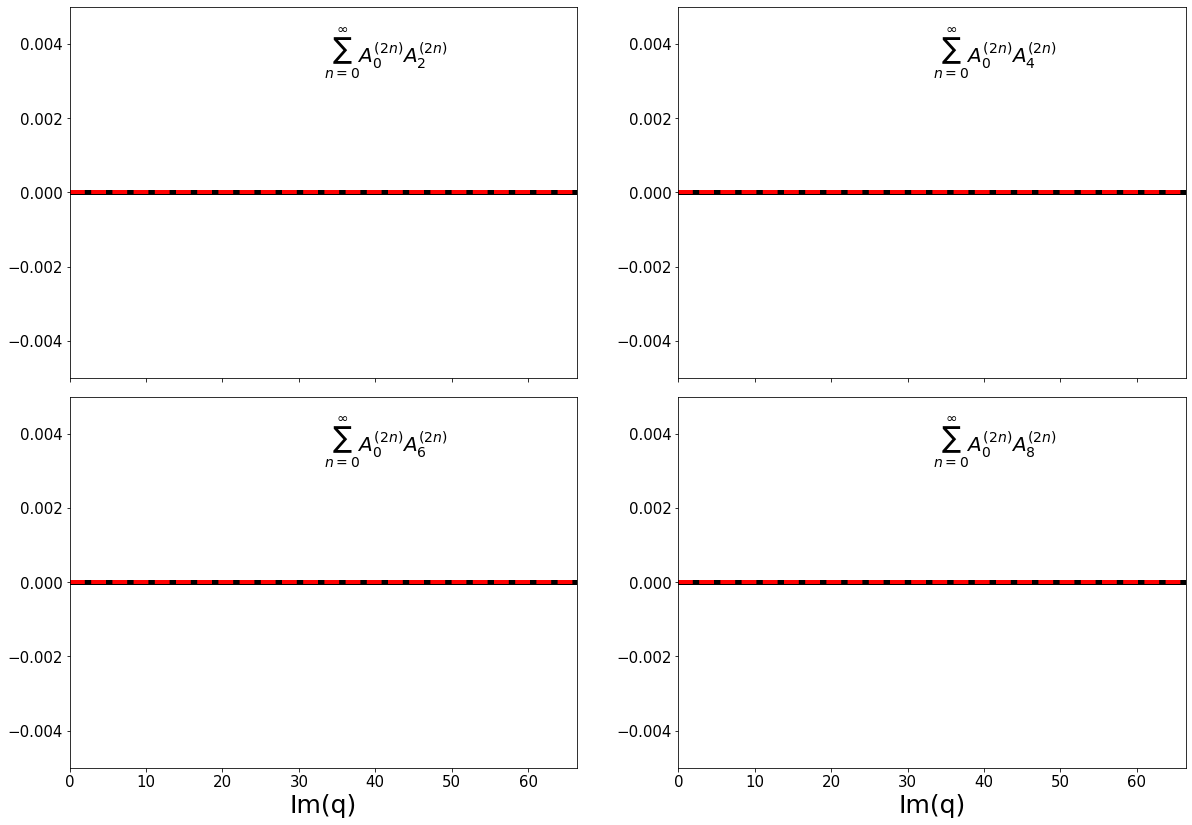

In [13]:
fig, ax = plt.subplots(figsize=(20, 14))
gs = gridspec.GridSpec(2,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, sum02.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
ax1.annotate(r'$\sum_{n=0}^{\infty}A_{0}^{(2n)}A_{2}^{(2n)}$', 
            xy=(Q[Nq//2].imag, 0.0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, sum04.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.annotate(r'$\sum_{n=0}^{\infty}A_{0}^{(2n)}A_{4}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, sum06.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax3.annotate(r'$\sum_{n=0}^{\infty}A_{0}^{(2n)}A_{6}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, sum08.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax4.annotate(r'$\sum_{n=0}^{\infty}A_{0}^{(2n)}A_{8}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
plt.show()

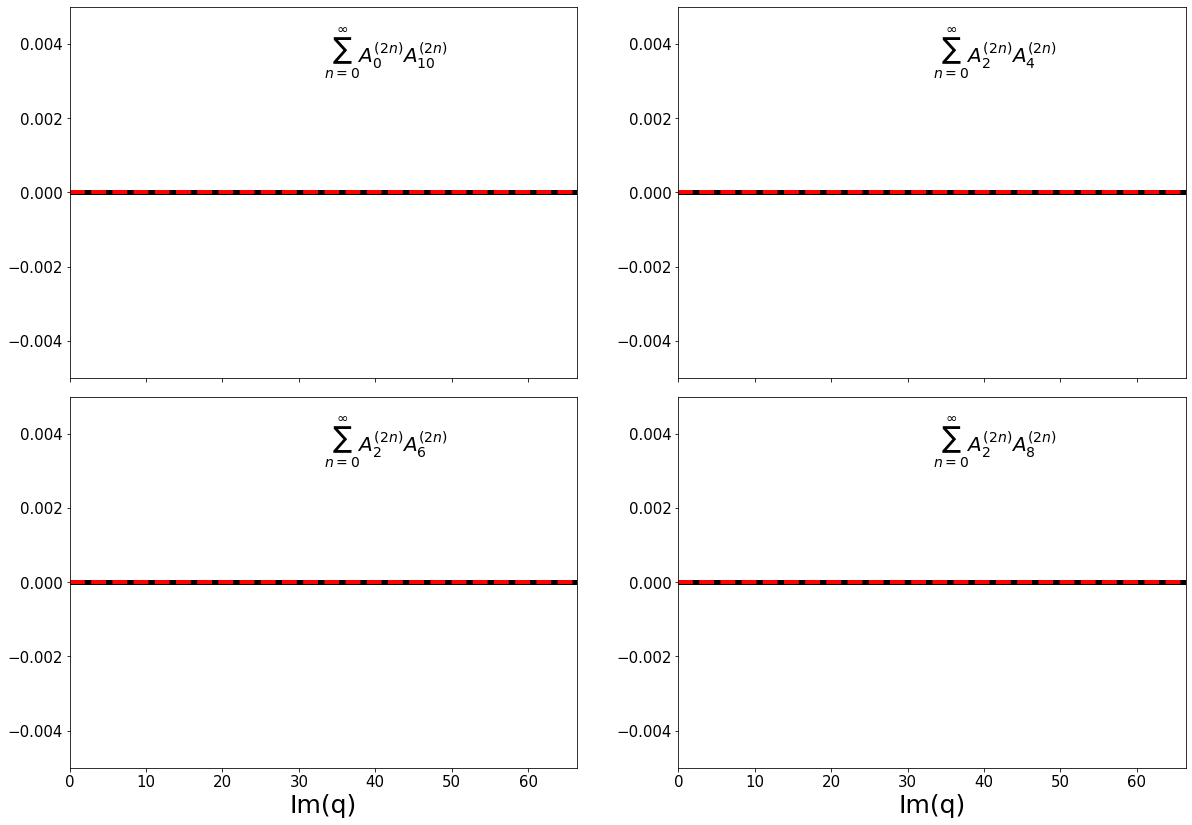

In [14]:
fig, ax = plt.subplots(figsize=(20, 14))
gs = gridspec.GridSpec(2,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, sum010.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
ax1.annotate(r'$\sum_{n=0}^{\infty}A_{0}^{(2n)}A_{10}^{(2n)}$', 
            xy=(Q[Nq//2].imag, 0.0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, sum24.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.annotate(r'$\sum_{n=0}^{\infty}A_{2}^{(2n)}A_{4}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, sum26.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax3.annotate(r'$\sum_{n=0}^{\infty}A_{2}^{(2n)}A_{6}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, sum28.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax4.annotate(r'$\sum_{n=0}^{\infty}A_{2}^{(2n)}A_{8}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
plt.show()

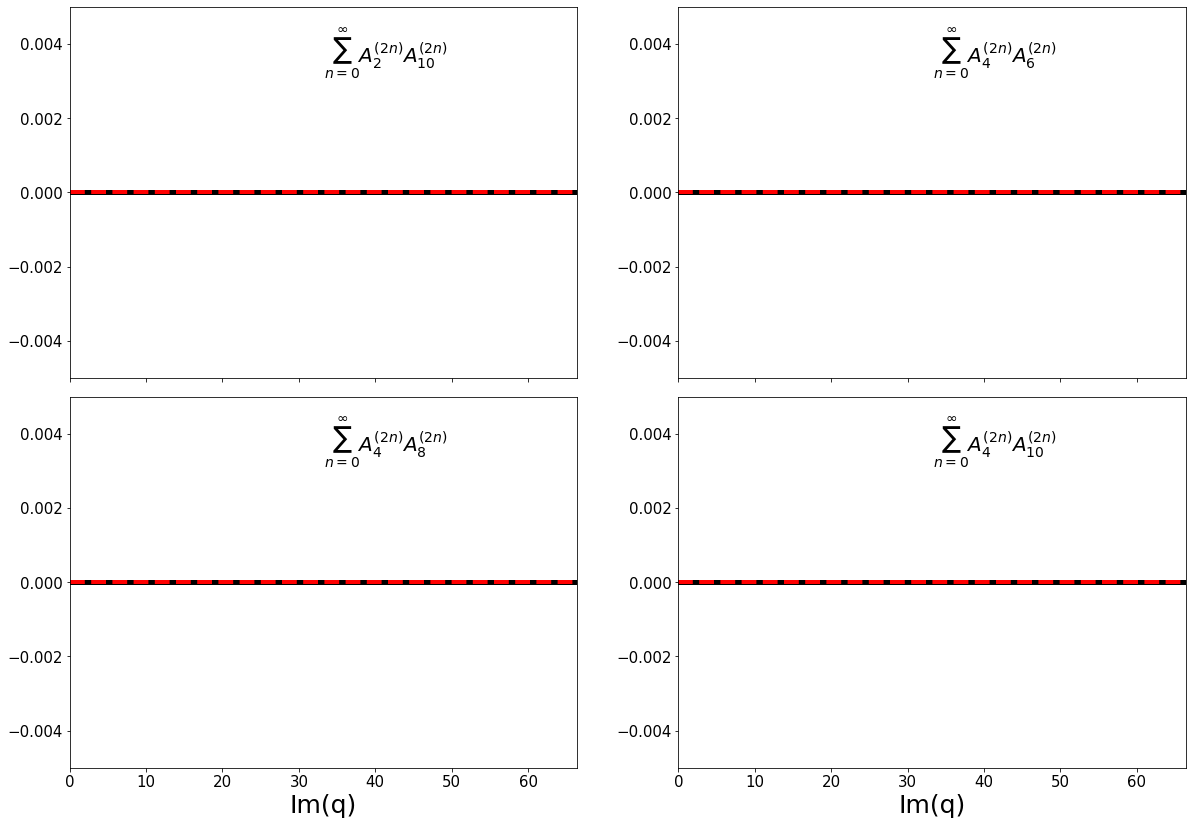

In [15]:
fig, ax = plt.subplots(figsize=(20, 14))
gs = gridspec.GridSpec(2,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, sum210.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
ax1.annotate(r'$\sum_{n=0}^{\infty}A_{2}^{(2n)}A_{10}^{(2n)}$', 
            xy=(Q[Nq//2].imag, 0.0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, sum46.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.annotate(r'$\sum_{n=0}^{\infty}A_{4}^{(2n)}A_{6}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, sum48.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax3.annotate(r'$\sum_{n=0}^{\infty}A_{4}^{(2n)}A_{8}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, sum410.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax4.annotate(r'$\sum_{n=0}^{\infty}A_{4}^{(2n)}A_{10}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
plt.show()

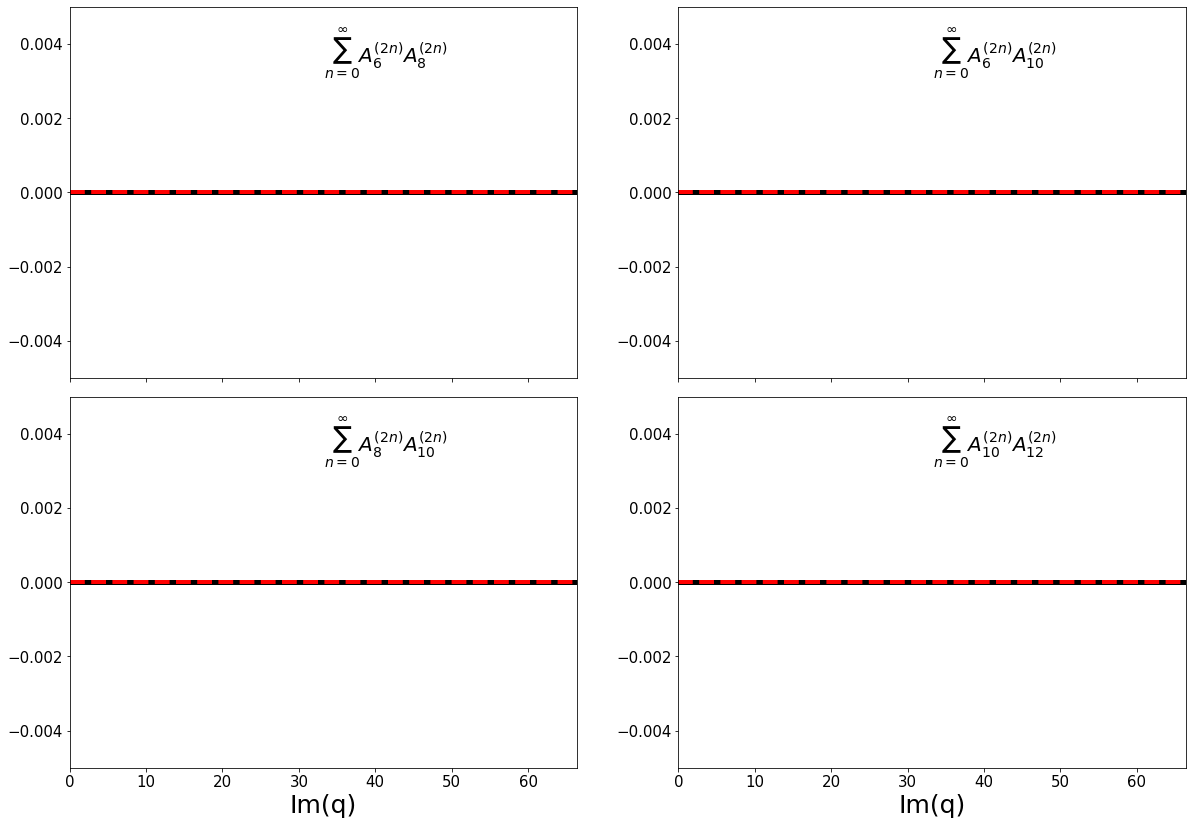

In [16]:
fig, ax = plt.subplots(figsize=(20, 14))
gs = gridspec.GridSpec(2,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, sum68.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
ax1.annotate(r'$\sum_{n=0}^{\infty}A_{6}^{(2n)}A_{8}^{(2n)}$', 
            xy=(Q[Nq//2].imag, 0.0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, sum610.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.annotate(r'$\sum_{n=0}^{\infty}A_{6}^{(2n)}A_{10}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, sum810.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax3.annotate(r'$\sum_{n=0}^{\infty}A_{8}^{(2n)}A_{10}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, sum1012.real, 'k', lw=5)
plt.plot(Q.imag, np.zeros(np.shape(Q)), 'r--', lw=4)
plt.ylim([-0.005, 0.005])
plt.xlim([Q[0].imag, Q[-1].imag])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Im(q)', fontsize=25)
ax4.annotate(r'$\sum_{n=0}^{\infty}A_{10}^{(2n)}A_{12}^{(2n)}$', 
            xy=(Q[Nq//2].imag, .0035), xytext=(Q[Nq//2].imag, 0.0035), fontsize=20)
plt.show()

# Mathieu Eigenfunctions

In [17]:
# Compute the Mathieu functions themselves:
Mathieufns = mfs.ce_even(Q, y, M, As=A_vals)

In [18]:
## Select the first Four Mathieu functions to plot below. More can be plotted too.
ce0 = Mathieufns['ce0']
ce2 = Mathieufns['ce2']
ce4 = Mathieufns['ce4']
ce6 = Mathieufns['ce6']

In [19]:
nq = 1
alpha = np.linspace(0, .15, len(Q))[::-1]

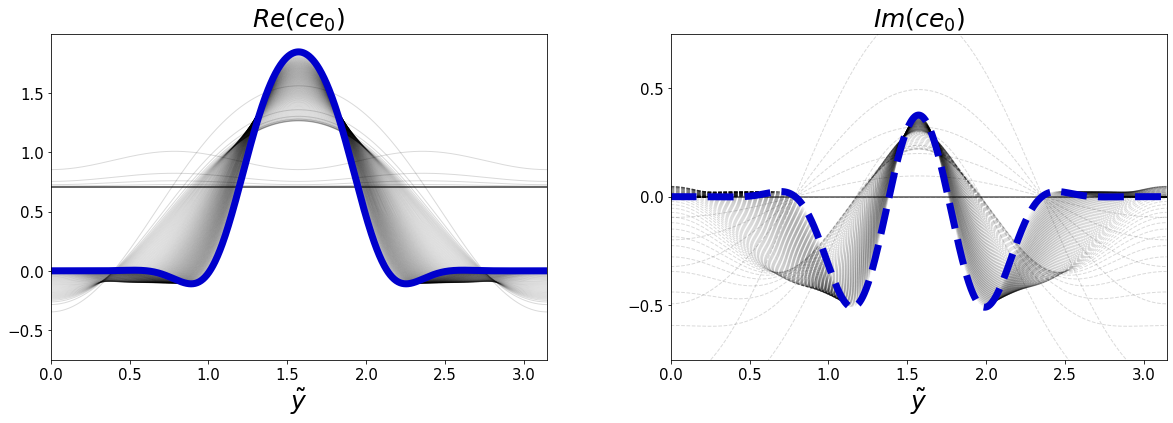

In [20]:
fig, ax = plt.subplots(figsize=(20, 6))
gs = gridspec.GridSpec(1, 2)
gs.update(hspace=0.1, wspace=0.25)
ax1 = plt.subplot(gs[0])
for k in range(len(Q[::nq])):
    plt.plot(y, ce0[nq * k, :].real, 'k', lw=1, alpha=alpha[nq * k])
plt.plot(y, ce0[0, :].real, 'k', lw=2, alpha=0.5)
plt.plot(y, ce0[-1, :].real, color=colors[0], lw=7)
plt.xlim(0, L)
plt.ylim(-.75, 2)
plt.xticks(size=15)
plt.yticks([-0.5, 0, .5, 1, 1.5], size=15)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.title(r'$Re(ce_{0})$', fontsize=25)
ax2 = plt.subplot(gs[1])
for k in range(len(Q[::nq])):
    plt.plot(y, ce0[nq * k, :].imag, 'k--', lw=1, alpha=alpha[nq * k])
plt.plot(y, ce0[0, :].imag, 'k',lw=2, alpha=0.5)
plt.plot(y, ce0[-1, :].imag, color=colors[0], lw=7, ls='--')
plt.xlim(0, L)
plt.xticks(size=15)
plt.yticks([-1, -.5, 0, .5, 1], size=15)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.ylim(-.75, .75)
plt.title(r'$Im(ce_{0})$', fontsize=25)
plt.show()

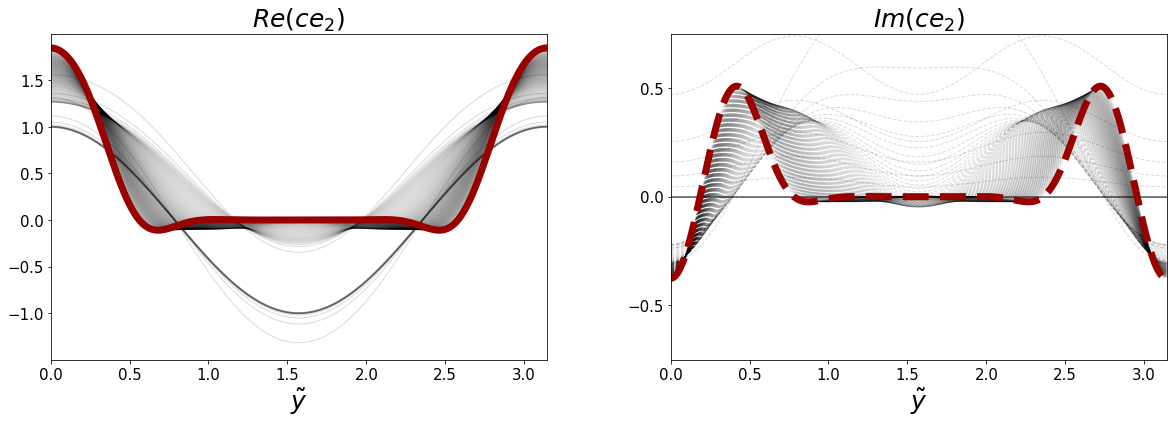

In [21]:
fig, ax = plt.subplots(figsize=(20, 6))
gs = gridspec.GridSpec(1, 2)
gs.update(hspace=0.1, wspace=0.25)
ax1 = plt.subplot(gs[0])
for k in range(len(Q[::nq])):
    plt.plot(y, ce2[nq * k, :].real, 'k', lw=1, alpha=alpha[nq * k])
plt.plot(y, ce2[0, :].real, 'k', lw=2, alpha=0.5)
plt.plot(y, ce2[-1, :].real, color=colors[1], lw=7)
plt.xlim(0, L)
plt.ylim(-1.5, 2)
plt.xticks(size=15)
plt.yticks([-1, -0.5, 0, .5, 1, 1.5], size=15)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.title(r'$Re(ce_{2})$', fontsize=25)
ax2 = plt.subplot(gs[1])
for k in range(len(Q[::nq])):
    plt.plot(y, ce2[nq * k, :].imag, 'k--', lw=1, alpha=alpha[nq * k])
plt.plot(y, ce2[0, :].imag, 'k',lw=2, alpha=0.5)
plt.plot(y, ce2[-1, :].imag, color=colors[1], lw=7, ls='--')
plt.xlim(0, L)
plt.xticks(size=15)
plt.yticks([-1, -.5, 0, .5, 1], size=15)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.ylim(-.75, .75)
plt.title(r'$Im(ce_{2})$', fontsize=25)
plt.show()

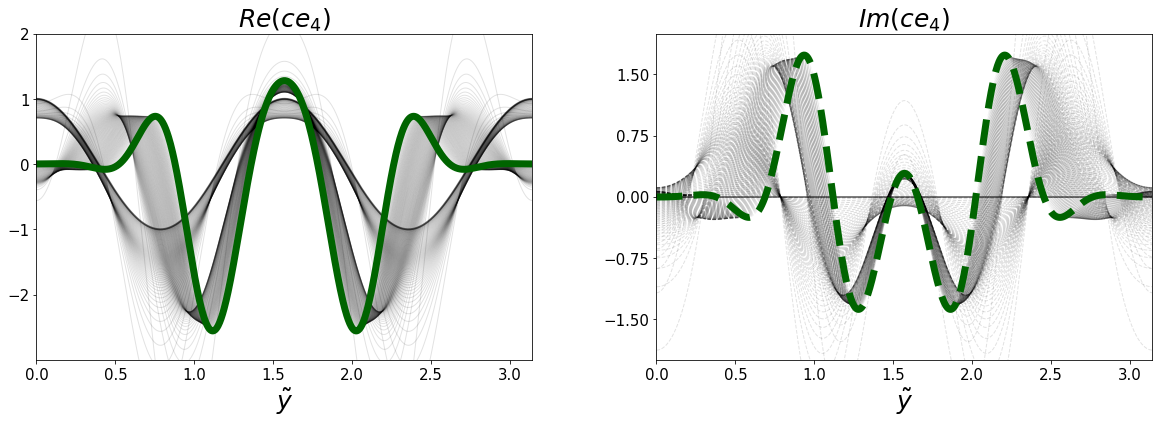

In [22]:
fig, ax = plt.subplots(figsize=(20, 6))
gs = gridspec.GridSpec(1, 2)
gs.update(hspace=0.1, wspace=0.25)
ax1 = plt.subplot(gs[0])
for k in range(len(Q[::nq])):
    plt.plot(y, ce4[nq * k, :].real, 'k', lw=1, alpha=alpha[nq * k])
plt.plot(y, ce4[0, :].real, 'k', lw=2, alpha=0.5, label=r'$1$')
plt.plot(y, ce4[-1, :].real, color=colors[2], lw=7, label=r'$Re(ce_{4})$')
plt.xlim(0, L)
plt.xticks(size=15)
plt.yticks([-2, -1, 0, 1, 2], size=15)
plt.ylim(-3, 2)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.title(r'$Re(ce_{4})$', fontsize=25)
ax2 = plt.subplot(gs[1])
for k in range(len(Q[::nq])):
    plt.plot(y, ce4[nq * k, :].imag, 'k--', lw=1, alpha=alpha[nq * k])
plt.plot(y, ce4[0, :].imag, 'k', lw=2, alpha=0.5, label=r'$1$')
plt.plot(y, ce4[-1, :].imag, color=colors[2], lw=7,ls='--', label=r'$Im(ce_{4})$')
plt.xlim(0, L)
plt.xticks(size=15)
plt.yticks([-1.5, -.75, 0, 0.75, 1.5], size=15)
plt.ylim(-2, 2)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.title(r'$Im(ce_{4})$', fontsize=25)
plt.show()

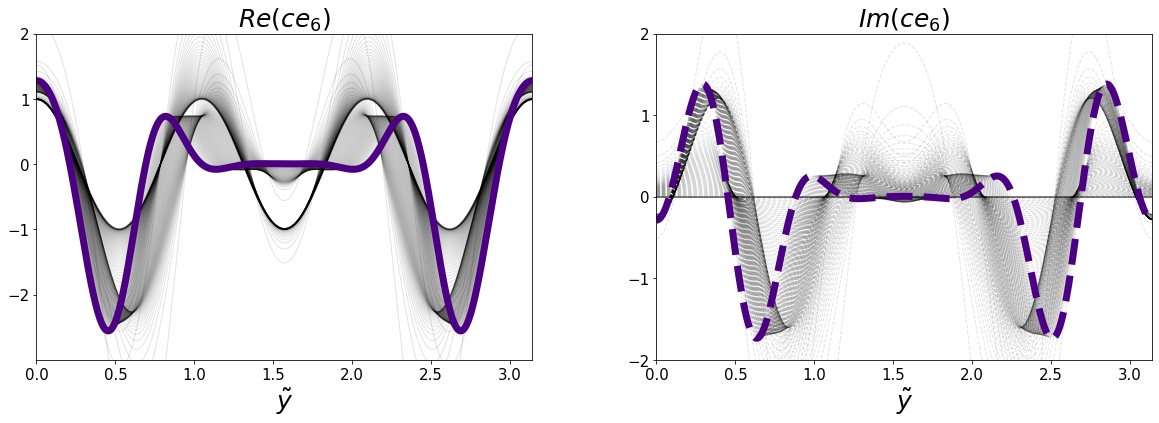

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
gs = gridspec.GridSpec(1, 2)
gs.update(hspace=0.1, wspace=0.25)
ax1 = plt.subplot(gs[0])
for k in range(len(Q[::nq])):
    plt.plot(y, ce6[nq * k, :].real, 'k', lw=1, alpha=alpha[k])
plt.plot(y, ce6[0, :].real, 'k', lw=2, alpha=0.5)
plt.plot(y, ce6[-1, :].real, color=colors[3], lw=7)
plt.xlim(0, L)
plt.xticks(size=15)
plt.ylim(-3, 2)
plt.yticks([-2, -1, 0, 1, 2], size=15)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.title(r'$Re(ce_{6})$', fontsize=25)
ax2 = plt.subplot(gs[1])
for k in range(len(Q[::nq])):
    plt.plot(y, ce6[nq * k, :].imag, 'k--', lw=1, alpha=alpha[k])
plt.plot(y, ce6[0, :].imag, 'k', lw=2, alpha=0.5)
plt.plot(y, ce6[-1, :].imag, color=colors[3], lw=7, ls='--')
plt.xlim(0, L)
plt.xticks(size=15)
plt.yticks([-2, -1, 0, 1, 2], size=15)
plt.ylim(-2, 2)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.title(r'$Im(ce_{6})$', fontsize=25)
plt.show()

## More Identities

These involve the Mathieu functions:

\begin{equation}
1 = 2\sum_{n=0}^{\infty}A_{0}^{(2n)} ce_{2n}(y, q) ,
\end{equation}

and

\begin{equation}
\cos(2r\tilde{y}) = \sum_{n=0}^{\infty}A_{2r}^{(2n)} ce_{2n}(\tilde{y}, q), ;\;\;\;r >1 .
\end{equation}

Also notice that
\begin{equation}
\lim_{q \rightarrow 0} ce_{2n} (\tilde{y},q) = \cos 2n\tilde{y} ,
\end{equation}
which can be seen in the figures above (look for the black lines in the plots above).

In [24]:
CE = []
for k in range(M):
    CE.append(Mathieufns['ce'+str(2*k)])
COS0 = []
COS2 = []
COS4 = []
COS6 = []
for k in range(len(Q)):
    cos0 = [A_vals['A'+str(2 * n)][k, 0] * CE[n][k, :] for n in range(len(CE))]
    cos2 = [A_vals['A'+str(2 * n)][k, 1] * CE[n][k, :] for n in range(len(CE))]
    cos4 = [A_vals['A'+str(2 * n)][k, 2] * CE[n][k, :] for n in range(len(CE))]
    cos6 = [A_vals['A'+str(2 * n)][k, 3] * CE[n][k, :] for n in range(len(CE))]
    COS0.append(2 * np.sum(cos0, axis=0))
    COS2.append(np.sum(cos2, axis=0))
    COS4.append(np.sum(cos4, axis=0))
    COS6.append(np.sum(cos6, axis=0))
    
COS0 = np.array(COS0)
COS2 = np.array(COS2)
COS4 = np.array(COS4)
COS6 = np.array(COS6)


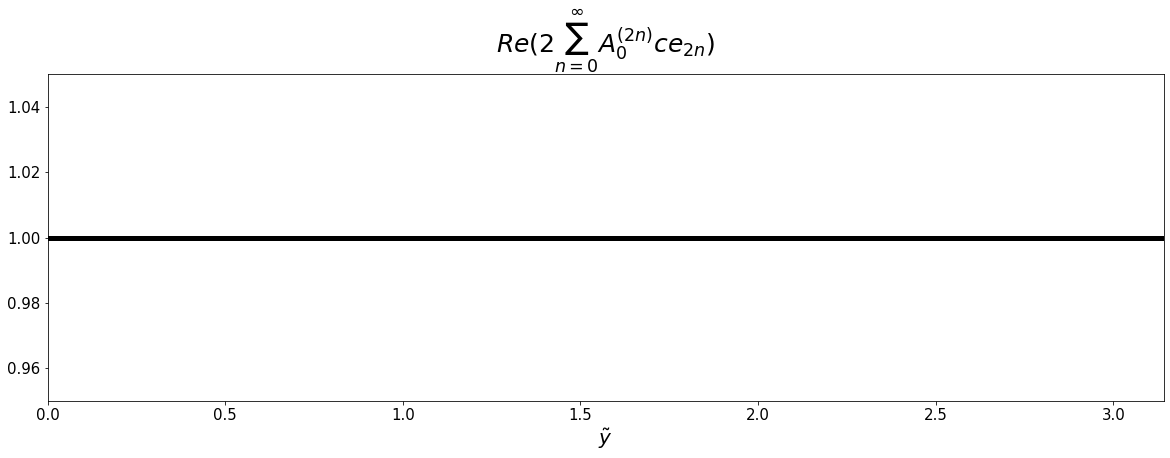

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
for k in range(len(Q)):
    plt.plot(y, COS0[k, :].real)
plt.plot(y, COS0[-1, :].real, 'k', lw=5)
plt.ylim(.95, 1.05)
plt.xlabel(r'$\tilde{y}$', fontsize=20)
plt.xlim(0, np.pi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$Re(2\sum_{n=0}^{\infty}A_{0}^{(2n)}ce_{2n})$', fontsize=25)
plt.show()

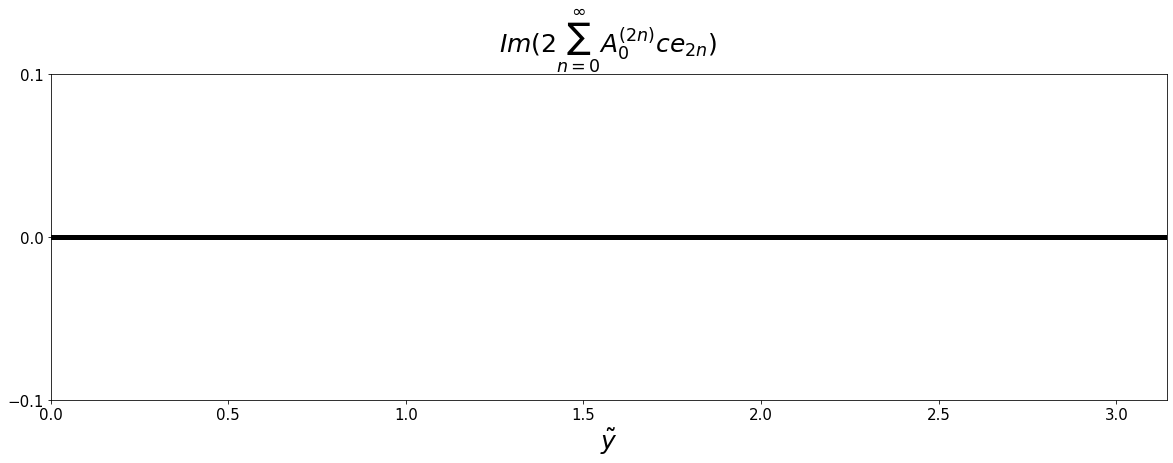

In [26]:
fig, ax = plt.subplots(figsize=(20, 6))
for k in range(len(Q)):
    plt.plot(y, COS0[k, :].imag)
plt.plot(y, COS0[-1, :].imag, 'k', lw=5)
plt.ylim(-0.1, 0.1)
plt.xlabel(r'$\tilde{y}$', fontsize=25)
plt.xlim(0, np.pi)
plt.xticks(size=15)
plt.yticks([-0.1,0, 0.1], size=15)
plt.title(r'$Im(2\sum_{n=0}^{\infty}A_{0}^{(2n)}ce_{2n})$', fontsize=25)
plt.show()

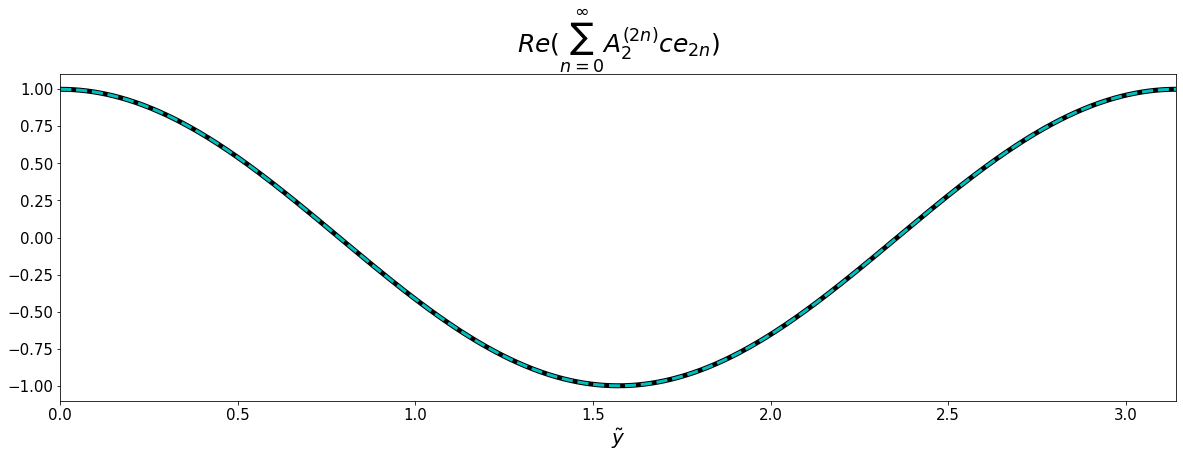

In [27]:
fig, ax = plt.subplots(figsize=(20, 6))
for k in range(len(Q)):
    plt.plot(y, COS2[k, :].real)
plt.plot(y, COS2[-1, :].real, 'k', lw=5)
plt.plot(y, np.cos(2*y), 'c--', lw=3)
# plt.ylim(.95, 1.05)
plt.xlabel(r'$\tilde{y}$', fontsize=20)
plt.xlim(0, np.pi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$Re(\sum_{n=0}^{\infty}A_{2}^{(2n)}ce_{2n})$', fontsize=25)
plt.show()

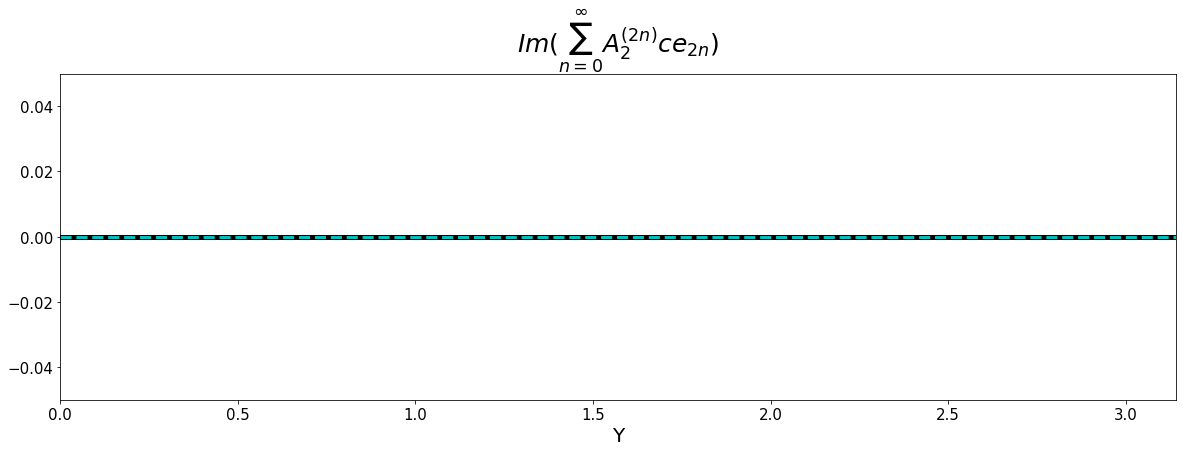

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))
for k in range(len(Q)):
    plt.plot(y, COS2[k, :].imag)
plt.plot(y, COS2[-1, :].imag, 'k', lw=5)
plt.plot(y, 0*np.cos(2*y), 'c--', lw=3)
plt.ylim(-.05, .05)
plt.xlabel('Y', fontsize=20)
plt.xlim(0, np.pi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$Im(\sum_{n=0}^{\infty}A_{2}^{(2n)}ce_{2n})$', fontsize=25)
plt.show()

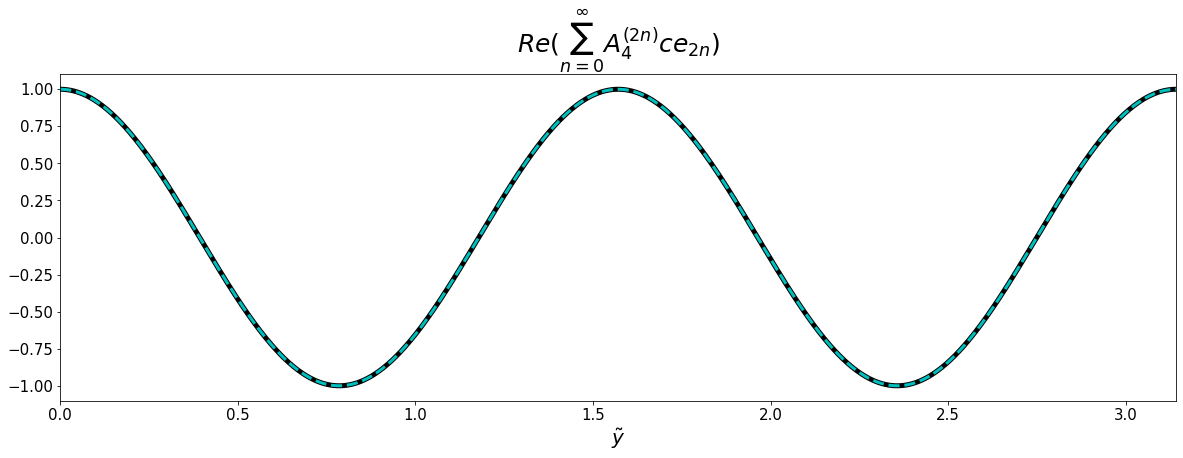

In [29]:
fig, ax = plt.subplots(figsize=(20, 6))
for k in range(len(Q)):
    plt.plot(y, COS4[k, :].real)
plt.plot(y, COS4[-1, :].real, 'k', lw=5)
plt.plot(y, np.cos(4*y), 'c--', lw=3)
# plt.ylim(.95, 1.05)
plt.xlabel(r'$\tilde{y}$', fontsize=20)
plt.xlim(0, np.pi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$Re(\sum_{n=0}^{\infty}A_{4}^{(2n)}ce_{2n})$', fontsize=25)
plt.show()

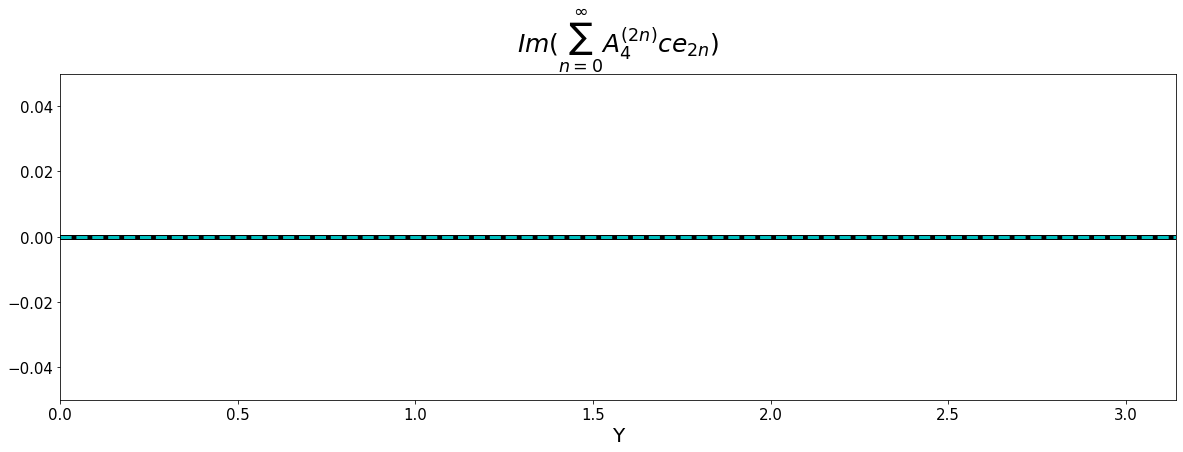

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
for k in range(len(Q)):
    plt.plot(y, COS4[k, :].imag)
plt.plot(y, COS4[-1, :].imag, 'k', lw=5)
plt.plot(y, 0*np.cos(4*y), 'c--', lw=3)
plt.ylim(-.05, .05)
plt.xlabel('Y', fontsize=20)
plt.xlim(0, np.pi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$Im(\sum_{n=0}^{\infty}A_{4}^{(2n)}ce_{2n})$', fontsize=25)
plt.show()

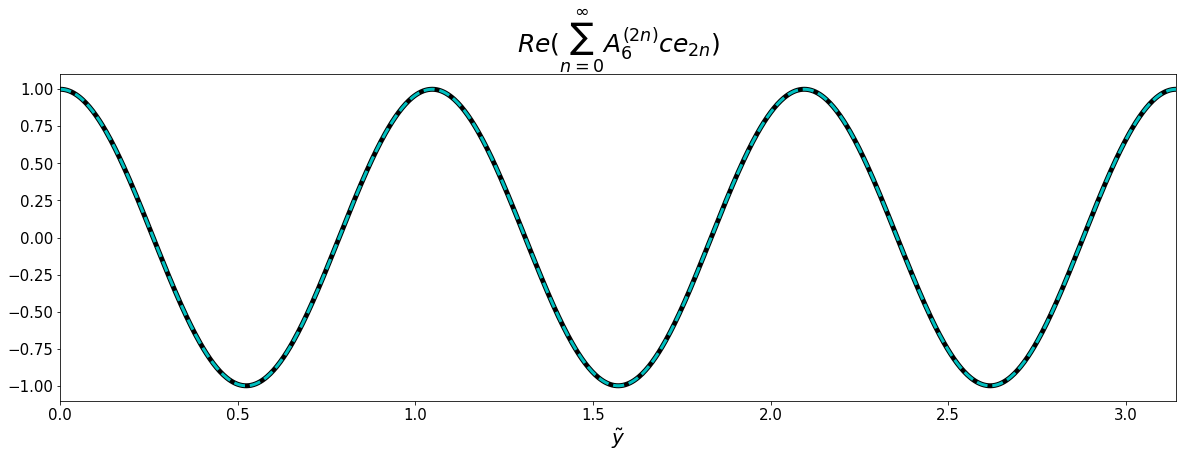

In [31]:
fig, ax = plt.subplots(figsize=(20, 6))
for k in range(len(Q)):
    plt.plot(y, COS6[k, :].real)
plt.plot(y, COS6[-1, :].real, 'k', lw=5)
plt.plot(y, np.cos(6*y), 'c--', lw=3)
# plt.ylim(.95, 1.05)
plt.xlabel(r'$\tilde{y}$', fontsize=20)
plt.xlim(0, np.pi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$Re(\sum_{n=0}^{\infty}A_{6}^{(2n)}ce_{2n})$', fontsize=25)
plt.show()

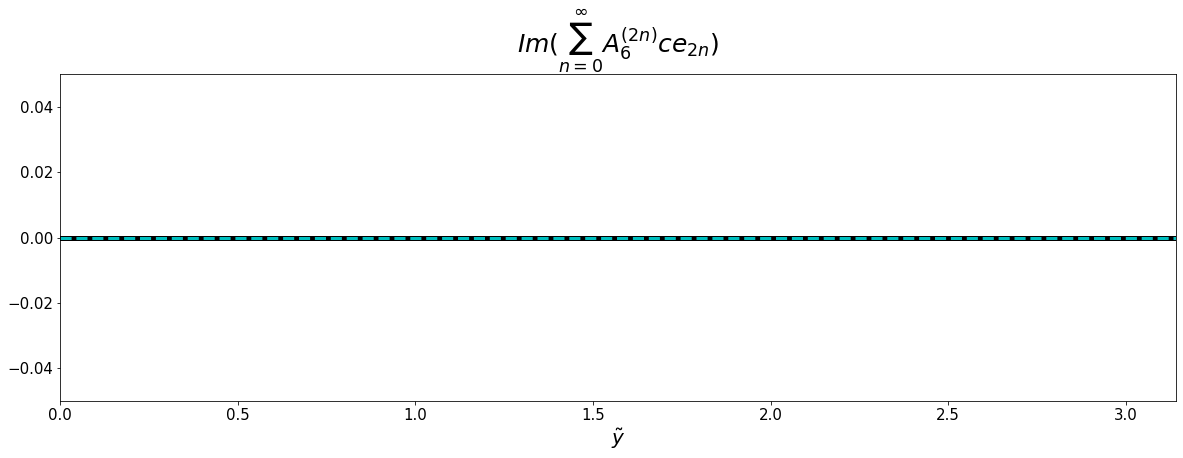

In [32]:
fig, ax = plt.subplots(figsize=(20, 6))
for k in range(len(Q)):
    plt.plot(y, COS6[k, :].imag)
plt.plot(y, COS6[-1, :].imag, 'k', lw=5)
plt.plot(y, 0*np.cos(6*y), 'c--', lw=3)
plt.ylim(-.05, .05)
plt.xlabel(r'$\tilde{y}$', fontsize=20)
plt.xlim(0, np.pi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(r'$Im(\sum_{n=0}^{\infty}A_{6}^{(2n)}ce_{2n})$', fontsize=25)
plt.show()